# Front Running Capability (FRC)

$$ \\ $$


**Explanation of statistic:** FRC will come into play for pitchers who are neither starters nor closers for a given year, 2018 in this case. Essentially I will only be looking at relief pitchers for FRC. The pitchers evaluated will be in situations where it is after the starting pitcher has already pithced and before the 8th inning to avoid gathering closer data. I am only concerned with games in the middle innings where a team has at least a 3 run lead. From there, pitchers will be assigned a 'strike ratio', which is $\dfrac{strikes}{balls}$ for every recorded statcast pitch. There will also be consideration for a pitcher's 'effective speed', at least the average across all pitchers in the season. These stats will be compared with the pitcher's ERA for the entire season to see if there is any correlation between them.


In [6]:
import pandas as pd
import matplotlib.pylab as plt
from scipy import stats 
%matplotlib inline
# gather 2017-2018 lahman and statcast data
pitchers = pd.read_csv("C:/Users/eric_/Documents/CU/sabermetrics/baseballdatabank-2019.2/core/Pitching.csv")
master = pd.read_csv('master.csv', encoding = "ISO-8859-1")
#df2017 = pd.read_csv('statcast_2017.csv')
statcast = pd.read_csv('statcast_2018.csv')
#frames = [df2017, df2018]
# combine 2017 and 2018 statcast data together
#statcast = pd.concat(frames)

pitchers = pitchers.loc[pitchers['yearID'] >= 2018]
pd.set_option('display.max_columns', 500)


merged = pd.merge(pitchers, master,left_on=['playerID'], right_on=['lahman_id'], how='inner')
# remove starters and closers
merged = merged.loc[(merged['GS']==0) & (merged["SV"]==0) & (merged["G"]>30)]

In [7]:
def difference(row):
    if(row['away_score']>row['home_score']):
        return(row['away_score']-row['home_score'])
    else:
        return(row['home_score']-row['away_score'])

In [8]:
statcast['diff'] = statcast.apply (lambda row: difference(row), axis=1)
upThreeRuns = statcast.loc[(statcast['diff'] >=3) &(statcast['inning']>3) &(statcast['inning']<8)]
#upThreeRuns

In [9]:
upThree = upThreeRuns.groupby('player_name')["pitcher","strikes", "balls", "effective_speed"].mean().reset_index()
upThree = upThree.reset_index()
#upThree.rename(columns={'player_name':'playerID'}, inplace=True)
#upThree
earlyClosers = pd.merge(upThree, merged, left_on=['pitcher'], right_on=['mlb_id'], how='inner')
earlyClosers

,index,player_name,pitcher,strikes,balls,effective_speed,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,mlb_id,mlb_name,mlb_pos,mlb_team,mlb_team_long,bats,throws,birth_year,bp_id,bref_id,bref_name,cbs_id,cbs_name,cbs_pos,espn_id,espn_name,espn_pos,fg_id,fg_name,fg_pos,lahman_id,nfbc_id,nfbc_name,nfbc_pos,retro_id,retro_name,debut,yahoo_id,yahoo_name,ottoneu_id,ottoneu_name,ottoneu_pos,rotowire_id,rotowire_name,rotowire_pos
0,4,Aaron Bummer,607481.0,0.796748,1.000000,89.762612,bummeaa01,2018,1,CHA,AL,0,1,37,0,0,0,0,95,40,15,1,10,35,0.301,4.26,0.0,7,1.0,1,144.0,9,19,0.0,0.0,5.0,607481,Aaron Bummer,P,CWS,Chicago White Sox,L,L,1993,71057,bummeaa01,Aaron Bummer,2637180.0,Aaron Bummer,RP,36131.0,Aaron Bummer,RP,16258,Aaron Bummer,P,bummeaa01,10773.0,Aaron Bummer,P,bumma001,Aaron Bummer,20170727,10773.0,Aaron Bummer,29222.0,Aaron Bummer,RP,15148.0,Aaron Bummer,P
1,5,Aaron Loup,571901.0,0.959259,0.851852,86.035775,loupaa01,2018,1,TOR,AL,0,0,50,0,0,0,0,107,44,18,4,13,42,0.299,4.54,0.0,0,3.0,0,166.0,7,21,0.0,3.0,3.0,571901,Aaron Loup,P,SD,San Diego Padres,L,L,1987,60619,loupaa01,Aaron Loup,1960798.0,Aaron Loup,RP,32397.0,Aaron Loup,RP,10343,Aaron Loup,P,loupaa01,9236.0,Aaron Loup,P,loupa001,Aaron Loup,20120714,9236.0,Aaron Loup,6008.0,Aaron Loup,RP,12617.0,Aaron Loup,P
2,20,Addison Reed,592665.0,0.993590,0.884615,88.922284,reedad01,2018,1,MIN,AL,1,6,55,0,0,0,0,168,65,28,11,15,44,0.298,4.50,3.0,2,3.0,0,242.0,14,30,2.0,4.0,5.0,592665,Addison Reed,P,MIN,Minnesota Twins,L,R,1988,67085,reedad01,Addison Reed,1813264.0,Addison Reed,RP,31493.0,Addison Reed,RP,10586,Addison Reed,P,reedad01,9053.0,Addison Reed,P,reeda001,Addison Reed,20110904,9053.0,Addison Reed,13922.0,Addison Reed,RP,11502.0,Addison Reed,P
3,32,Alex Wilson,543935.0,0.851190,0.970238,88.800464,wilsoal01,2018,1,DET,AL,2,4,59,0,0,0,0,185,50,23,8,15,43,0.223,3.36,2.0,2,2.0,0,245.0,13,24,2.0,2.0,4.0,543935,Alex Wilson,P,MIL,Milwaukee Brewers,R,R,1986,60051,wilsoal01,Alex Wilson,1799270.0,Alex Wilson,RP,31557.0,Alex Wilson,RP,9239,Alex Wilson,P,wilsoal01,9364.0,Alex Wilson,P,wilsa001,Alex Wilson,20130411,9364.0,Alex Wilson,4555.0,Alex Wilson,RP,10995.0,Alex Wilson,P
4,35,Amir Garrett,607237.0,0.862191,0.922261,90.897103,garream01,2018,1,CIN,NL,1,2,66,0,0,0,0,189,56,30,8,25,71,0.239,4.29,3.0,3,3.0,0,264.0,7,30,1.0,1.0,7.0,607237,Amir Garrett,P,CIN,Cincinnati Reds,R,L,1992,70946,garream01,Amir Garrett,2053474.0,Amir Garrett,RP,33652.0,Amir Garrett,RP,14375,Amir Garrett,P,garream01,10171.0,Amir Garrett,P,garra001,Amir Garrett,20170407,10171.0,Amir Garrett,23566.0,Amir Garrett,RP,13611.0,Amir Garrett,P
5,37,Andrew Chafin,605177.0,1.089286,0.794643,89.144205,chafian01,2018,1,ARI,NL,1,6,77,0,0,0,0,148,41,17,0,25,53,0.227,3.10,1.0,3,2.0,0,211.0,13,18,0.0,3.0,3.0,605177,Andrew Chafin,P,ARI,Arizona Diamondbacks,R,L,1990,70436,chafian01,Andrew Chafin,1967936.0,Andrew Chafin,RP,32810.0,Andrew Chafin,RP,12988,Andrew Chafin,P,chafian01,9782.0,Andrew Chafin,P,chafa001,Andrew Chafin,20140813,9782.0,Andrew Chafin,18157.0,Andrew Chafin,RP,12155.0,Andrew Chafin,P
6,56,Austin Brice,592169.0,0.870588,0.850980,88.822867,briceau01,2018,1,CIN,NL,2,3,33,0,0,0,0,112,39,24,9,13,32,0.271,5.79,6.0,1,3.0,0,162.0,8,26,1.0,1.0,3.0,592169,Austin Brice,P,MIA,Miami Marlins,R,R,1992,66940,briceau01,Austin Brice,2118904.0,Austin Brice,RP,31722.0,Austin Brice,RP,17237,Austin Brice,P,briceau01,10362.0,Austin Brice,P,brica001,Austin Brice,20160812,10362.0,Austin Brice,14680.0,Austin Brice,RP,12904.0,Austin Brice,P
7,88,Brandon Workman,519443.0,0.901408,0.934272,86.422183,workmbr01,2018,1,BOS,AL,6,1,43,0,0,0,0,124,34,15,6,16,37,0.230,3.27,0.0,0,0.0,0,167.0,4,15,0.0,3.0,1.0,519443,Brandon Workman,P,BOS,Boston Red Sox,R,R,1988,68414,workmbr01,Brandon Workman,2050707.0,Brandon Workman,RP,32973.0,Brandon Workman,RP,11428,Brandon Workman,P,workmbr01,9457.0,Brandon Workman,P,workb001,Brandon Workman,20130710,9457.0,Brandon Workman,14924.0,Brandon Workman,RP,

In [10]:
earlyClosers['strike_ratio'] = earlyClosers['strikes']/earlyClosers['balls']
earlyClosersShort = earlyClosers.groupby(['player_name','teamID','G'])['effective_speed', 'strike_ratio','ERA'].mean().reset_index()
strRatioTop = earlyClosersShort.sort_values(by=['strike_ratio'], ascending=False)
effSpeedTop = earlyClosersShort.sort_values(by=['effective_speed'], ascending=False)

In [14]:
strRatioTop

,player_name,teamID,G,effective_speed,strike_ratio,ERA
63,Tony Watson,SFN,72,86.314449,2.160000,2.59
46,Richard Bleier,BAL,31,85.207407,1.447368,1.93
48,Ryan Brasier,BOS,34,92.893262,1.444444,1.60
47,Richard Rodriguez,PIT,63,89.778706,1.409962,2.47
71,Zach McAllister,CLE,41,93.078535,1.392857,4.97
5,Andrew Chafin,ARI,77,89.144205,1.370787,3.10
41,Oliver Perez,CLE,51,84.653351,1.340426,1.39
69,Yusmeiro Petit,OAK,74,86.430627,1.297959,3.00
12,Chasen Bradford,SEA,46,87.568504,1.285714,3.69
11,Chad Green,NYA,63,94.248812,1.259640,2.50


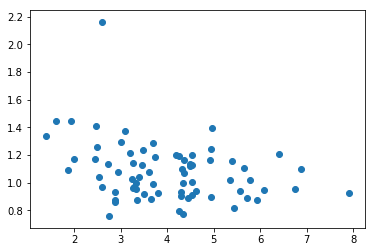

In [28]:
plt.scatter(strRatioTop['ERA'], strRatioTop['strike_ratio'])

In [15]:
def simpleLinearLUL():
    
    fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(14,7))

    plt.scatter(strRatioTop['ERA'],strRatioTop['strike_ratio'],color='magenta',edgecolors='skyblue',s=100,alpha=0.5,label='Strike Ratio')
    
    bMean, aMean, rVal, pVal, std = stats.linregress(strRatioTop['ERA'], strRatioTop['strike_ratio'])
    
    print('')
    print('y = ', aMean ,' + ', bMean)
    
    ax.plot(strRatioTop['ERA'],aMean+bMean*strRatioTop['ERA'],color='skyblue',lw=3,label='ERA',ls='-')
    ax.set_xlabel("ERA",fontsize=14,color='black')  
    ax.set_ylabel("Strike Ratio",fontsize=14,color='black')
    ax.set_title("Strike Ratio and ERA",fontsize=14,color='black')
    ax.set_axisbelow(True)
    ax.grid()
    
    plt.legend()
    plt.show()


y =  1.2783743157698868  +  -0.04962983048661688


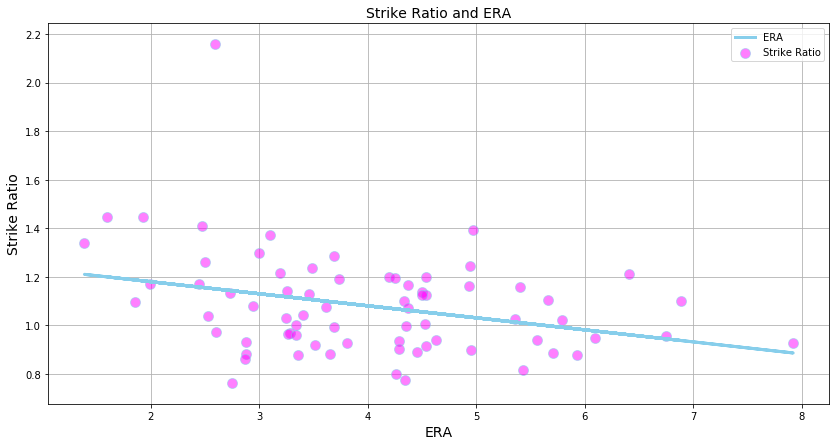

In [16]:
simpleLinearLUL()

In [17]:
effSpeedTop

,player_name,teamID,G,effective_speed,strike_ratio,ERA
59,Tayron Guerrero,MIA,60,96.353029,0.815385,5.43
64,Tyler Glasnow,PIT,34,94.719297,0.772043,4.34
11,Chad Green,NYA,63,94.248812,1.259640,2.50
42,Pedro Baez,LAN,55,93.338948,0.932271,2.88
71,Zach McAllister,CLE,41,93.078535,1.392857,4.97
48,Ryan Brasier,BOS,34,92.893262,1.444444,1.60
28,Jake Petricka,TOR,41,92.834496,1.006601,4.53
29,James Pazos,SEA,60,92.607674,0.879377,2.88
10,Carl Edwards Jr.,CHN,58,92.183684,0.972603,2.60
23,Emilio Pagan,OAK,55,92.082101,0.996000,4.35


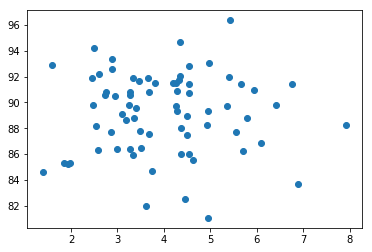

In [29]:
plt.scatter(strRatioTop['ERA'], strRatioTop['effective_speed'])

In [11]:
def simpleLinearSpeed():
    
    fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(14,7))

    plt.scatter(strRatioTop['ERA'],strRatioTop['effective_speed'],color='magenta',edgecolors='skyblue',s=100,alpha=0.5,label='Strike Ratio')
    
    bMean, aMean, rVal, pVal, std = stats.linregress(strRatioTop['ERA'], strRatioTop['effective_speed'])
    
    print('')
    print('y = ', aMean ,' + ', bMean)
    
    ax.plot(strRatioTop['ERA'],aMean+bMean*strRatioTop['ERA'],color='skyblue',lw=3,label='ERA',ls='-')
    ax.set_xlabel("ERA",fontsize=14,color='black')  
    ax.set_ylabel("Effective Speed",fontsize=14,color='black')
    ax.set_title("Interest in Science Every Year",fontsize=14,color='black')
    ax.set_axisbelow(True)
    ax.grid()
    
    plt.legend()
    plt.show()


y =  89.07693692598397  +  0.023216689643966962


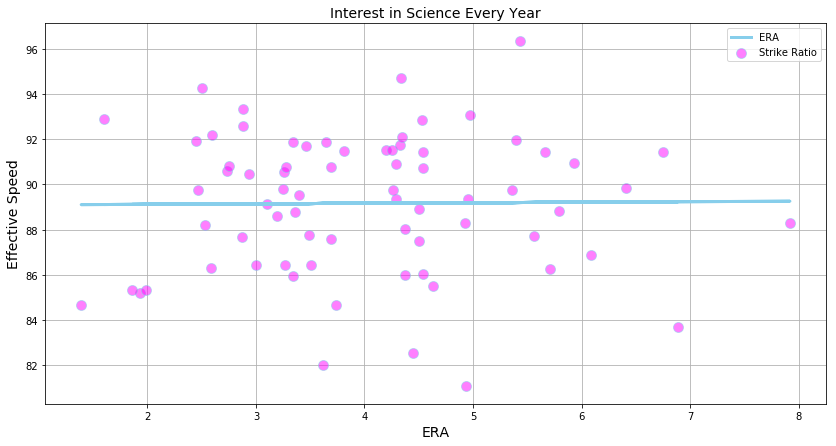

In [12]:
simpleLinearSpeed()

### Strike ratio vs effective top speed

I sorted the 2018 relief pitchers by both strike ratio $\frac{strikes}{balls}$ and effective spead, both using the average for the year. Then I looked up those players and saw how their 2018 seasons were and compared how well each sorting method picked relief pitchers. 